#LAB 9 : Dimensionality Reduction

  1. Principal Component Analysis (PCA)
  2. Linear Discriminant Analysis (LDA)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#PCA

Text(0.5, 1.0, 'distribution in y direction')

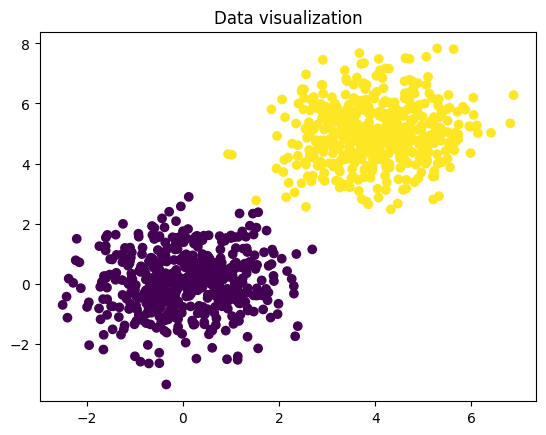

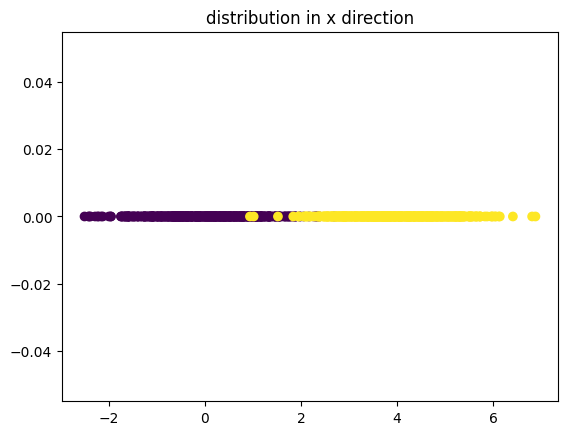

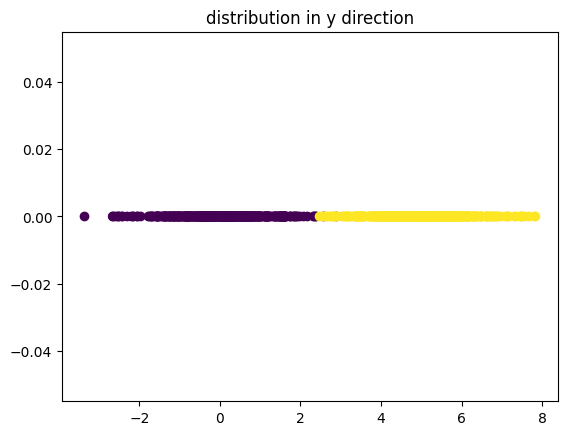

In [2]:
import numpy as np
import matplotlib.pyplot as plt

mean1=np.array([0,0])
mean2=np.array([4,5])
var=np.array([[1,0.1],[0.1,1]])
np.random.seed(0)
data1=np.random.multivariate_normal(mean1,var,500)
data2=np.random.multivariate_normal(mean2,var,500)
data=np.concatenate((data1,data2))
label=np.concatenate((np.zeros(data1.shape[0]),np.ones(data2.shape[0])))

plt.figure()
plt.scatter(data[:,0],data[:,1],c=label)
plt.title('Data visualization')
plt.figure()
plt.scatter(data[:,0],np.zeros(data.shape[0]),c=label)
plt.title('distribution in x direction')
plt.figure()
plt.scatter(data[:,1],np.zeros(data.shape[0]),c=label)
plt.title('distribution in y direction')


Text(0.5, 1.0, 'Data visualization')

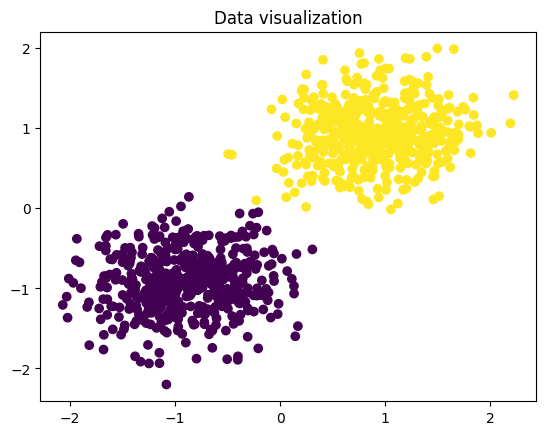

In [3]:
#Data normalization

data1=(data-np.mean(data,axis=0))
data=data1/np.std(data1,axis=0)
plt.figure()
plt.scatter(data[:,0],data[:,1],c=label)
plt.title('Data visualization')

variance along pca1 direction= 1.8477663843459722
variance along pca2 direction= 0.15223361565402702


Text(0.5, 1.0, 'distribution in pca2 direction')

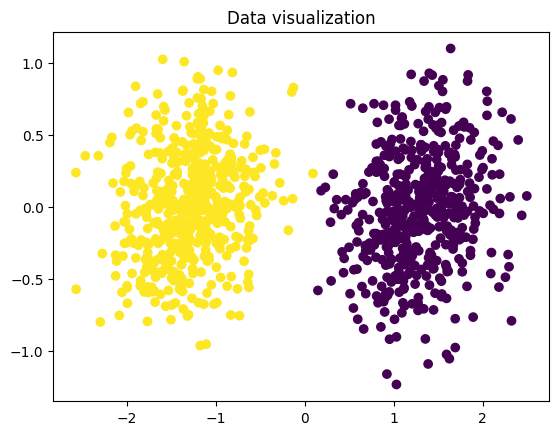

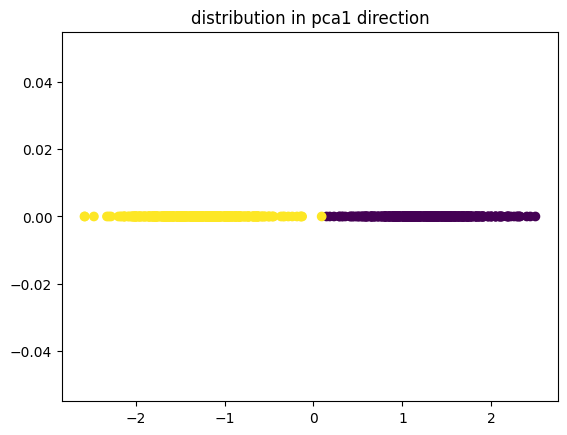

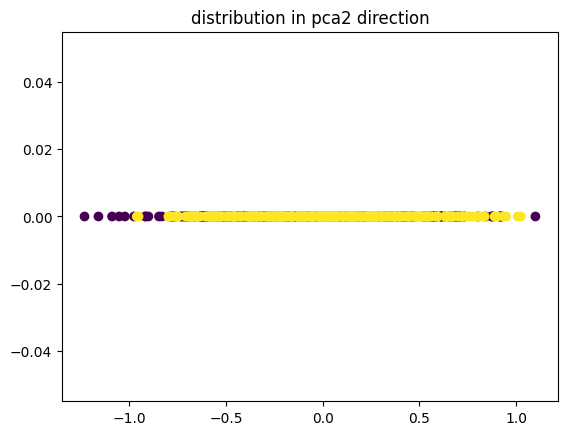

In [4]:
# PCA

# coverance matrix
cov=data.T @ data


# using sigular value decomposition
u,s,v=np.linalg.svd(cov)

trans_data=data @ u

var_pca1=np.var(trans_data[:,0])
var_pca2=np.var(trans_data[:,1])

print('variance along pca1 direction=',var_pca1)
print('variance along pca2 direction=',var_pca2)


plt.figure()
plt.scatter(trans_data[:,0],trans_data[:,1],c=label)
plt.title('Data visualization')
plt.figure()
plt.scatter(trans_data[:,0],np.zeros(data.shape[0]),c=label)
plt.title('distribution in pca1 direction')
plt.figure()
plt.scatter(trans_data[:,1],np.zeros(data.shape[0]),c=label)
plt.title('distribution in pca2 direction')

In [5]:
class pca:
  # Constructor
  def __init__(self, name='reg',data=None,retain_dim=None):
    self.name = name  # Create an instance variable
    self.data=data
    self.retain_dim = retain_dim if retain_dim is not None else self.ret_dim(self.data)
    # compute pca transform value
  def pca_comp(self,data):
    data = self.pre_process(data)
    cov= data.T @ data
    u,_,_=np.linalg.svd(cov) # singular value decomposition
    u_req=u[:,:self.retain_dim]
    trans_data=data @ u_req
    return trans_data,u_req
    # compute the required retain dimension
  def ret_dim(self,data):
    data=self.pre_process(data)
    cov=data.T @ data
    _,s,_=np.linalg.svd(cov)
    ind=(np.where((np.cumsum(s)/np.sum(s))>0.9))[0][0] # can also take 99% 
    return ind+1
  def pre_process(self,data):
    data1=(data-np.mean(data,axis=0))
    
    data=data1/(np.std(data1,axis=0)+10**(-30)) # avoid divide by zero
    return data

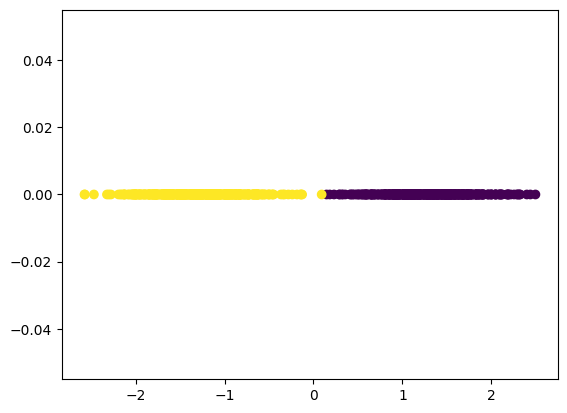

In [6]:
# pca transformation
PCA=pca(data=data)
trans_data,trans_mat=PCA.pca_comp(data)
plt.scatter(trans_data,np.zeros(trans_data.shape),c=label)

In [7]:
#classification using pca
#use k-nearest neighbour classifier after dimensionality reduction

from sklearn.neighbors import KNeighborsClassifier
k=5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(trans_data, label)

print('KNN Training accuracy =',knn.score(trans_data,label)*100)

# test data
np.random.seed(0)
data1=np.random.multivariate_normal(mean1,var,50)
data2=np.random.multivariate_normal(mean2,var,50)
data=np.concatenate((data1,data2))
tst_label=np.concatenate((np.zeros(data1.shape[0]),np.ones(data2.shape[0])))

print('KNN Testing accuracy =',knn.score(PCA.pre_process(data) @ trans_mat,tst_label)*100)


KNN Training accuracy = 99.9
KNN Testing accuracy = 100.0


##PCA on MNIST

In [8]:
%pip install idx2numpy

/bin/bash: which: line 1: syntax error: unexpected end of file
/bin/bash: error importing function definition for `which'
Defaulting to user installation because normal site-packages is not writeable
distutils: /home/abhishekj/.local/lib/python3.9/site-packages
sysconfig: /home/abhishekj/.local/lib64/python3.9/site-packages
user = True
home = None
root = None
prefix = None
You should consider upgrading via the '/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [9]:
from tensorflow import keras

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

2022-10-29 00:14:17.501743: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-29 00:14:17.824876: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/abhishekj/projects/papi_install/usr/local/lib:
2022-10-29 00:14:17.824899: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-10-29 00:14:17.868506: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been register

In [10]:
print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [11]:
cls = [2,3,4]

indx2_train = np.where(y_train == 2)
indx3_train = np.where(y_train == 3)
indx4_train = np.where(y_train == 4)

img2_train  = x_train[indx2_train]
img3_train  = x_train[indx3_train] 
img4_train  = x_train[indx4_train] 

X_train = (img2_train.reshape(28*28, -1).T, img3_train.reshape(28*28, -1).T, img4_train.reshape(28*28, -1).T)
X_train = np.concatenate(X_train)/255
Y_train = np.concatenate((indx2_train[0], indx3_train[0], indx4_train[0]))

print(X_train.shape)
print(Y_train.shape)

indx2_test = np.where(y_test == 2)
indx3_test = np.where(y_test == 3)
indx4_test = np.where(y_test == 4)

img2_test  = x_train[indx2_test]
img3_test  = x_train[indx3_test] 
img4_test  = x_train[indx4_test] 

X_test = (img2_test.reshape(28*28, -1).T, img3_test.reshape(28*28, -1).T, img4_test.reshape(28*28, -1).T)
X_test = np.concatenate(X_test)/255
Y_test = np.concatenate((indx2_test[0], indx3_test[0], indx4_test[0]))

print(X_test.shape)
print(Y_test.shape)

(17931, 784)
(17931,)
(3024, 784)
(3024,)


In [12]:
from sklearn.decomposition import PCA

pca = PCA(n_components='mle')

X_Train_pca = pca.fit_transform(X_train)

In [13]:
X_Test_pca = pca.transform(X_train)

In [14]:
from sklearn.linear_model import LogisticRegression

log = LogisticRegression()

log.fit(X_Train_pca, Y_train)

: 

: 

In [ ]:
Y_pred = log.predict(X_Test_pca)

from sklearn.metrics import accuracy_score, confusion_matrix

print(f'Logistic testing score is {accuracy_score(Y_test,Y_pred)}')

[327 336 336 336 327 294 336 336 336 336 142 142 142 380 380 142 380 198
 198 380 354  86  86  86 438 438 215 120 363  86 171 171 380 380 380 380
 336 336 336 130 336 130 380 380 380 472 354 354 354 354 354 354 342 342
 472 336 220 220 380 380]
Logistic testing score is 0.0


#LDA

Text(0.5, 1.0, 'distribution in y direction')

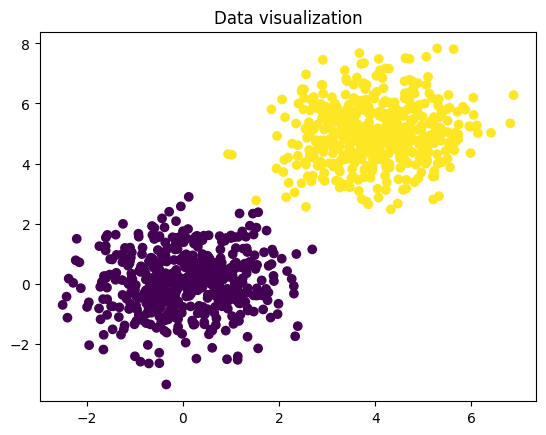

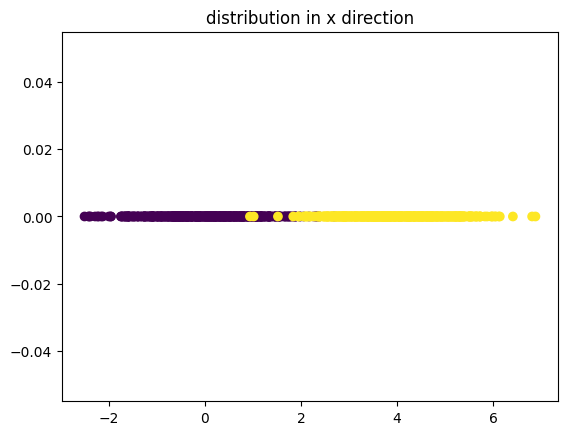

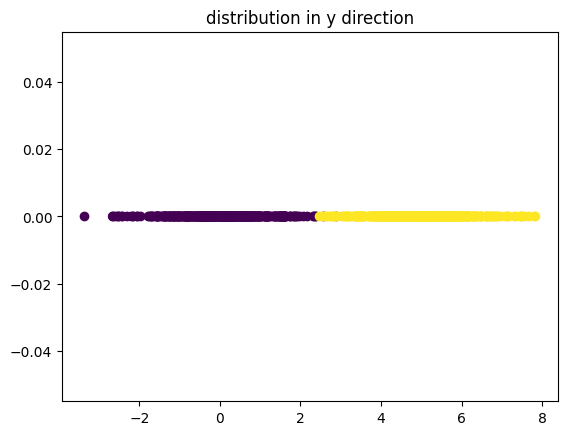

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# data generation

mean1=np.array([0,0])
mean2=np.array([4,5])
var=np.array([[1,0.1],[0.1,1]])
np.random.seed(0)
data1=np.random.multivariate_normal(mean1,var,500)
data2=np.random.multivariate_normal(mean2,var,500)
data=np.concatenate((data1,data2))
label=np.concatenate((np.zeros(data1.shape[0]),np.ones(data2.shape[0])))

plt.figure()
plt.scatter(data[:,0],data[:,1],c=label)
plt.title('Data visualization')
plt.figure()
plt.scatter(data[:,0],np.zeros(data.shape[0]),c=label)
plt.title('distribution in x direction')
plt.figure()
plt.scatter(data[:,1],np.zeros(data.shape[0]),c=label)
plt.title('distribution in y direction')

In [2]:
# perform 2-class and m-class LDA
def LDA(data,label):  
  id={}
  data_l={}
  mean_l={}
  cov_l={}
  S_w=np.zeros((data.shape[1],data.shape[1]))
  cls=np.unique(label)

  for i in cls:
    id[i]=np.where(label==i)[0]
    data_l[i]=data[id[i],:]
    mean_l[i]=np.mean(data_l[i],axis=0)
    cov_l[i]=((data_l[i]-mean_l[i]).T @ (data_l[i]-mean_l[i]))/(data_l[i].shape[0]-1)
    S_w=S_w+cov_l[i]


  S_w=S_w/len(data_l)

  if len(data_l)==2:
    S_b=(mean_l[1]-mean_l[0]).T @ (mean_l[1]-mean_l[0])
    w=np.linalg.pinv(S_w) @ (mean_l[1]-mean_l[0]).T

  else:
    S_t=np.cov(data,rowvar=False)
    S_b=S_t-S_w
    u,_,_=np.linalg.svd(np.linalg.pinv(S_w) @ S_b)
    w=u[:,:len(data_l)-1]

  return w




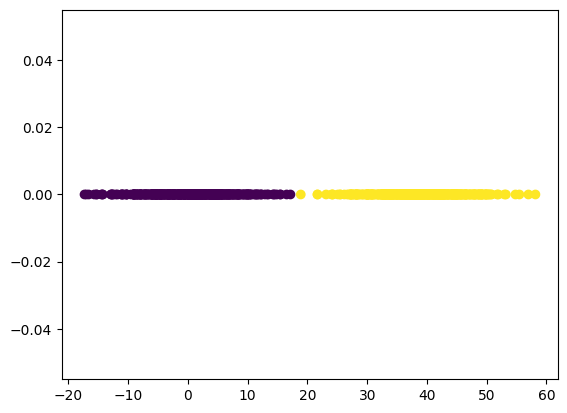

In [3]:
# after LDA projection

w=LDA(data,label)
plt.figure()
plt.scatter(data @ w,np.zeros(data.shape[0]),c=label)


In [4]:
#classification using LDA
#use k-nearest neighbour classifier after dimensionality reduction


from sklearn.neighbors import KNeighborsClassifier

LDA_data= data @ w[:,np.newaxis]
k=5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(LDA_data, label)

print('KNN Training accuracy =',knn.score(LDA_data,label)*100)

# test data
np.random.seed(0)
data1=np.random.multivariate_normal(mean1,var,50)
data2=np.random.multivariate_normal(mean2,var,50)
data_tst=np.concatenate((data1,data2))
tst_label=np.concatenate((np.zeros(data1.shape[0]),np.ones(data2.shape[0])))

print('KNN Testing accuracy =',knn.score(data_tst@ w[:,np.newaxis],tst_label)*100)



KNN Training accuracy = 100.0
KNN Testing accuracy = 100.0


##LDA Multiclass

Text(0.5, 1.0, 'distribution in y direction')

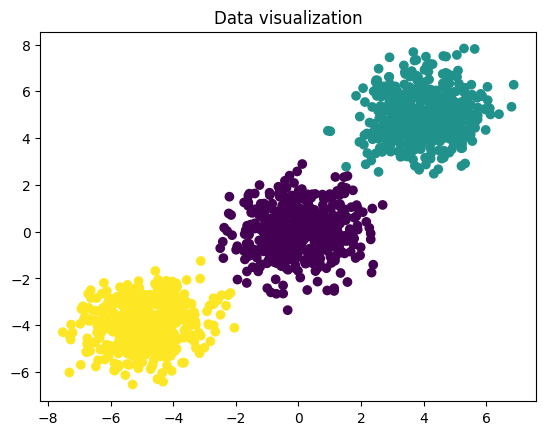

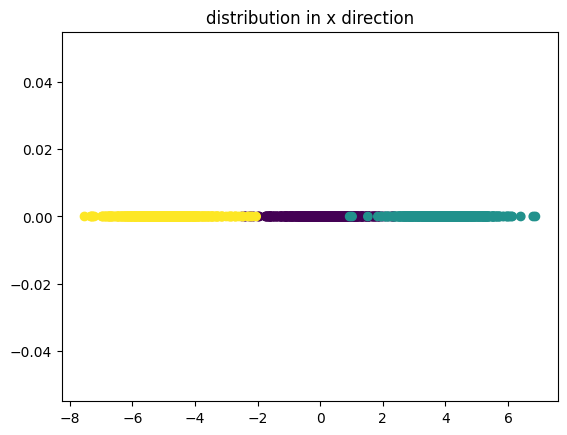

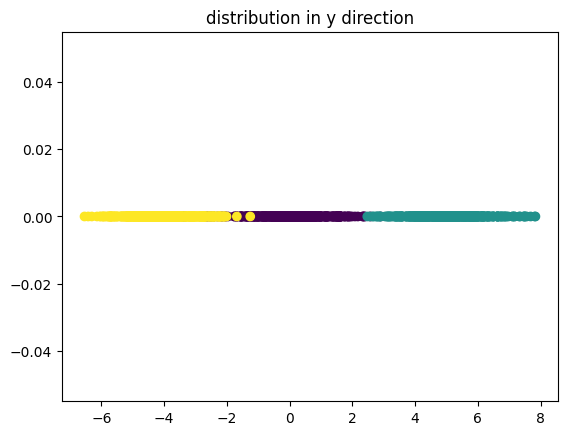

In [5]:
import numpy as np
import matplotlib.pyplot as plt

mean1=np.array([0,0])
mean2=np.array([4,5])
mean3=np.array([-5,-4])
var=np.array([[1,0.1],[0.1,1]])
np.random.seed(0)
data1=np.random.multivariate_normal(mean1,var,500)
data2=np.random.multivariate_normal(mean2,var,500)
data3=np.random.multivariate_normal(mean3,var,500)
data=np.concatenate((data1,data2,data3))
label=np.concatenate((np.zeros(data1.shape[0]),np.ones(data2.shape[0]),np.ones(data3.shape[0])+1))

plt.figure()
plt.scatter(data[:,0],data[:,1],c=label)
plt.title('Data visualization')
plt.figure()
plt.scatter(data[:,0],np.zeros(data.shape[0]),c=label)
plt.title('distribution in x direction')
plt.figure()
plt.scatter(data[:,1],np.zeros(data.shape[0]),c=label)
plt.title('distribution in y direction')


(2, 2)


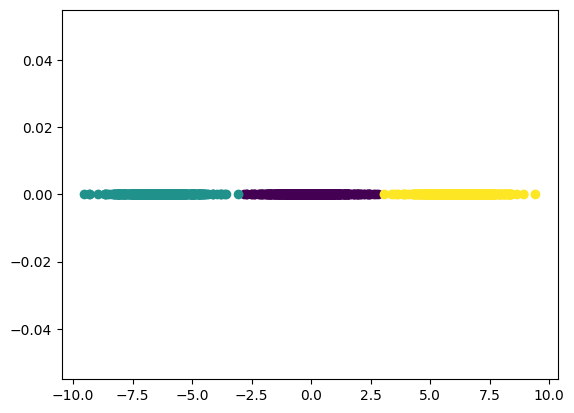

In [6]:
# after projection
w=LDA(data,label)
print(w.shape)
plt.figure()
plt.scatter(data @ w[:,0],np.zeros(data.shape[0]),c=label) # by performing 1D projection

In [7]:
# testing (using KNN)

from sklearn.neighbors import KNeighborsClassifier

LDA_data= data @ w
k=5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(LDA_data, label)

print('KNN Training accuracy =',knn.score(LDA_data,label)*100)

# test data
np.random.seed(0)
data1=np.random.multivariate_normal(mean1,var,50)
data2=np.random.multivariate_normal(mean2,var,50)
data3=np.random.multivariate_normal(mean3,var,50)
data_tst=np.concatenate((data1,data2,data3))
tst_label=np.concatenate((np.zeros(data1.shape[0]),np.ones(data2.shape[0]),np.ones(data2.shape[0])+1))

print('KNN Testing accuracy =',knn.score(data_tst@ w,tst_label)*100)


KNN Training accuracy = 99.93333333333332
KNN Testing accuracy = 100.0


**Perform LDA on MNIST and Classify using the data of any 3 classes**

In [8]:
## Write your code here
# MNIST data

file1='/content/train-images.idx3-ubyte' ## Change the path accordingly
file2='/content/train-labels.idx1-ubyte' ## Change the path accordingly

import idx2numpy

Images= idx2numpy.convert_from_file(file1)
labels= idx2numpy.convert_from_file(file2)

cl=[1,5]

# for class 1

id_1=np.where(labels==cl[0])
id1=id_1[0]
id1=id1[:50]
Im_1=Images[id1,:,:]
lab_1=labels[id1]

# for class 5
id_5=np.where(labels==cl[1])
id5=id_5[0]
id5=id5[:50]
Im_5=Images[id5,:,:]
lab_5=labels[id5]

plt.imshow(Im_1[1,:,:])
plt.figure()
plt.imshow(Im_5[1,:,:])

#print(Im_5.shape)

data=np.concatenate((Im_1,Im_5))
data=np.reshape(data,(data.shape[0],data.shape[1]*data.shape[2]))
print(data.shape)
G_lab=np.concatenate((lab_1,lab_5))
print(G_lab.shape)

data = data.astype('float32')

data /= 255



FileNotFoundError: [Errno 2] No such file or directory: '/content/train-images.idx3-ubyte'

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, G_lab, test_size=0.2, random_state=0)

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

In [ ]:
k=5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

print('KNN Training accuracy =',knn.score(X_train, y_train)*100)


KNN Training accuracy = 100.0


In [ ]:
y_pred = knn.predict(X_test)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' + str(accuracy_score(y_test, y_pred)*100))

[[9 1]
 [1 9]]
Accuracy90.0
